In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import feature_extraction,model_selection
import glob
import os
import string
from matplotlib import pyplot as plt
import tensorflow as tf
import keras as K
import zipfile

Using TensorFlow backend.


In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/digit-recognizer.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:
dataset=pd.read_csv("/content/train.csv")
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.utils import shuffle
dataset = shuffle(dataset)
#train_x,test_x,train_y,test_y=sklearn.model_selection.train_test_split(dataset.iloc[:,1:],dataset['label'],test_size=1000)
#test_y.shape
train_x,train_y=dataset.iloc[:,1:],dataset['label']

In [0]:
train_x=train_x.values.reshape((train_x.shape[0],28,28,1))
# test_x=test_x.values.reshape((test_x.shape[0],28,28,1))
train_x = np.pad(train_x, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# test_x= np.pad(test_x, ((0,0),(2,2),(2,2),(0,0)), 'constant')
from keras.models import Sequential
from keras.layers import Conv2D,AveragePooling2D,Flatten,Dense,Dropout
from keras.utils.np_utils import to_categorical
train_y = to_categorical(train_y)
# test_y = to_categorical(test_y)

In [0]:
model=Sequential()
model.add(Conv2D(filters=6,kernel_size=5,strides=1,activation='tanh',input_shape = (32,32,1)))
model.add(Dropout(0.05))
model.add(AveragePooling2D(pool_size=2,strides=2))
model.add(Conv2D(filters=16,kernel_size=5,strides=1,activation='tanh',input_shape = (14,14,6)))
model.add(Dropout(0.15))
model.add(AveragePooling2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(units = 120, activation = 'tanh'))
model.add(Dropout(0.15))
model.add(Dense(units = 84, activation = 'relu'))
model.add(Dropout(0.05))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
hisotry=model.fit(train_x,train_y,epochs = 200,batch_size=128)

Epoch 1/200
42000/42000 [==============================] - 4s 95us/step - loss: 0.3354 - acc: 0.8994
Epoch 2/200
42000/42000 [==============================] - 2s 54us/step - loss: 0.0980 - acc: 0.9694
Epoch 3/200
42000/42000 [==============================] - 2s 54us/step - loss: 0.0750 - acc: 0.9760
Epoch 4/200
42000/42000 [==============================] - 2s 51us/step - loss: 0.0622 - acc: 0.9806
Epoch 5/200
42000/42000 [==============================] - 2s 51us/step - loss: 0.0547 - acc: 0.9822
Epoch 6/200
42000/42000 [==============================] - 2s 51us/step - loss: 0.0506 - acc: 0.9845
Epoch 7/200
42000/42000 [==============================] - 2s 51us/step - loss: 0.0431 - acc: 0.9862
Epoch 8/200
42000/42000 [==============================] - 2s 56us/step - loss: 0.0384 - acc: 0.9875
Epoch 9/200
42000/42000 [==============================] - 2s 53us/step - loss: 0.0372 - acc: 0.9881
Epoch 10/200
42000/42000 [==============================] - 2s 51us/step - loss: 0.0350 - a

In [0]:
model.evaluate(test_x,test_y,batch_size=128,verbose=1)

1000/1000 [==============================] - 0s 64us/step


[0.08167773598432541, 0.9890000023841858]

In [0]:
yhat=model.predict(test_x)
yhat=np.argmax(yhat,axis=1).reshape(len(yhat),1)
yhat

array([5])

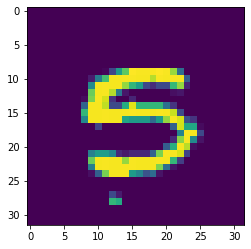

In [0]:
sample=test_x[750]
plt.imshow(sample.reshape((32,32)))
yhat[750]

In [0]:
test=pd.read_csv("/content/test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test=test.values.reshape((test.shape[0],28,28,1))
test= np.pad(test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
predictions=model.predict(test)
p=np.argmax(predictions,axis=1)

9

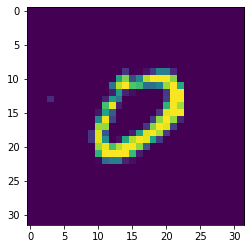

In [0]:
i=3
sample=test[i]
plt.imshow(sample.reshape((32,32)))
p[i]

In [0]:
df=pd.DataFrame(p)
df.index+=1
df=df.rename(columns={0:'Label'})
df.index.name='ImageId'
df.to_csv('output.csv')
df.head()

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3


In [0]:
test.shape

(28000, 32, 32, 1)